In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from scipy.stats import norm
import matplotlib.pyplot as plt


In [4]:
lyrics_df = pd.read_csv('./data/lyrics-data.csv')
artists_df = pd.read_csv('./data/artists-data.csv')

In [5]:
lyrics_df.head(5)

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [6]:
lyrics_df.shape

(379931, 5)

In [7]:
print(len(lyrics_df["language"].unique()))

53


## Look at the lyrics DF and the respective languages

['pt' 'es' 'en' nan 'it' 'gl' 'fr' 'de' 'tl' 'et' 'fi' 'pl' 'da' 'st' 'sv'
 'ro' 'af' 'no' 'eu' 'rw' 'sw' 'ga' 'cy' 'ca' 'ny' 'ko' 'ar' 'gd' 'tr'
 'id' 'su' 'lg' 'ru' 'nl' 'sq' 'is' 'cs' 'jw' 'lv' 'hu' 'ms' 'ku' 'zh'
 'hr' 'ht' 'fa' 'mg' 'vi' 'ja' 'hmn' 'sr' 'iw' 'sl']


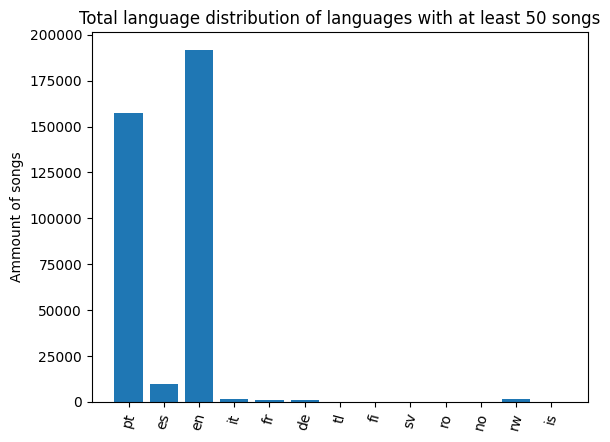

In [8]:
print(lyrics_df["language"].unique())

languages = lyrics_df["language"].unique()
# delete nan from list
languages = np.delete(languages,3)
language_count = lyrics_df["language"].value_counts()

# Put the language data in a new df
df = pd.DataFrame(columns=languages)
for language in languages:
    df[language] = [language_count[language]]
    

for col in df.columns:
    if df[col][0] < 50:
        # drop all languages with less than 100 songs
        df = df.drop(columns=col)    

        
        
data = df.iloc[:1].values[0]
labels = [col for col in df.columns]
fig, ax = plt.subplots()
plt.xticks(rotation = 75)
ax.bar(labels, data)
ax.set_ylabel('Ammount of songs')
plt.title('Total language distribution of languages with at least 50 songs')
plt.show()

## Data Preperation

### Since there is a majority of english songs, we will focus on them in the following

In [9]:
english_songs = lyrics_df["language"] == "en"
english_songs_df = lyrics_df[english_songs]
english_songs_df.head(5)

,ALink,SName,SLink,Lyric,language
69,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en
86,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en
88,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en
111,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en
140,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en


In [10]:
english_songs_df.shape

(191814, 5)

### Drop useless columns and rename the other ones to more expressive ones

In [11]:
#drop SLink Column since it has no use
english_songs_df=english_songs_df.drop('SLink', axis=1)

In [12]:
# rename columns to more expressive names
english_songs_df= english_songs_df.rename(columns={'ALink': 'Link', 'SName': 'Song_Name', 'Lyric': 'Song_Text', 'language': 'Language'})

In [13]:
# Get artist names from dataset 2
english_songs_df = pd.merge(english_songs_df, artists_df[['Link','Artist']], on='Link', how='left')
english_songs_df = english_songs_df.drop(["Link"], axis=1)

In [14]:
print(english_songs_df["Artist"].unique())

['Ivete Sangalo' 'Claudia Leitte' 'Daniela Mercury' ... 'Miriam Makeba'
 'Freddie Aguilar' 'Johnny Clegg']


In [15]:
english_songs_df.head(5)

,Song_Name,Song_Text,Language,Artist
0,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo
1,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",en,Ivete Sangalo
2,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",en,Ivete Sangalo
3,Easy,"Know it sounds funny\nBut, I just can't stand ...",en,Ivete Sangalo
4,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,en,Ivete Sangalo


In [16]:
# linebreaks are not important, replace them with " "
def remove_linebreak(string):
    string = string.replace("\n", " ")
    return string
english_songs_df["Song_Text"]=english_songs_df["Song_Text"].apply(remove_linebreak)
english_songs_df.head(5)

,Song_Name,Song_Text,Language,Artist
0,Careless Whisper,I feel so unsure As I take your hand and lead ...,en,Ivete Sangalo
1,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya Or even try to school,...",en,Ivete Sangalo
2,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here Don't be co...",en,Ivete Sangalo
3,Easy,"Know it sounds funny But, I just can't stand t...",en,Ivete Sangalo
4,For Your Babies (The Voice cover),You've got that look again The one I hoped I h...,en,Ivete Sangalo


## how many artists are in the dataset?


In [17]:
print("Artist count: " + str(len(english_songs_df["Artist"].unique())))
print(english_songs_df["Artist"].unique())

Artist count: 2489
['Ivete Sangalo' 'Claudia Leitte' 'Daniela Mercury' ... 'Miriam Makeba'
 'Freddie Aguilar' 'Johnny Clegg']


## How long is the average length of a song in chars and words?

In [18]:
# how long is Lyrics on average?
print('The average lyrics length is: ' + str(english_songs_df["Song_Text"].str.len().mean()) + "characters")
print('The average word count of a song: ' + str(english_songs_df["Song_Text"].str.split().str.len().mean()))

The average lyrics length is: 1262.9780360140553characters
The average word count of a song: 250.22915949826395


In [19]:
data = [len(text.split()) for text in english_songs_df["Song_Text"]]

# implement a more performant sort algorithm
def qsort(inlist):
    if inlist == []: 
        return []
    else:
        pivot = inlist[0]
        lesser = qsort([x for x in inlist[1:] if x < pivot])
        greater = qsort([x for x in inlist[1:] if x >= pivot])
        return lesser + [pivot] + greater
    
data_sorted = qsort(data)

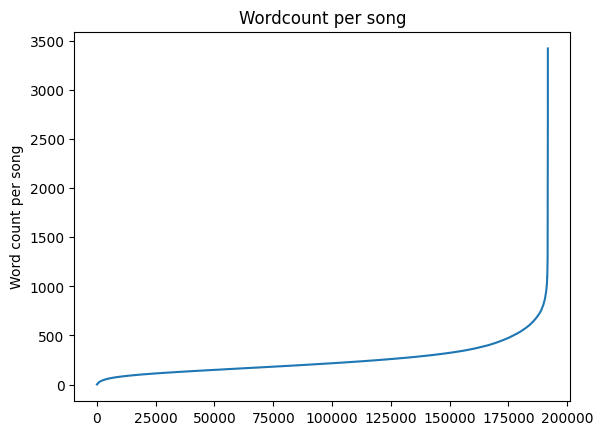

In [20]:
fig, ax = plt.subplots()
ax.plot(data_sorted)
ax.set_ylabel('Word count per song')
plt.title('Wordcount per song')
plt.show()

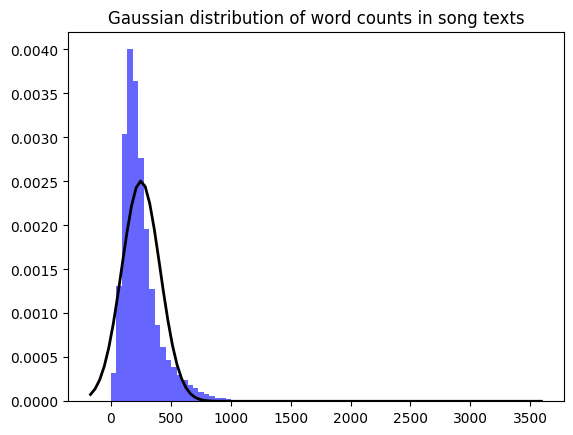

In [21]:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=75, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Gaussian distribution of word counts in song texts"
plt.title(title)
  
plt.show()

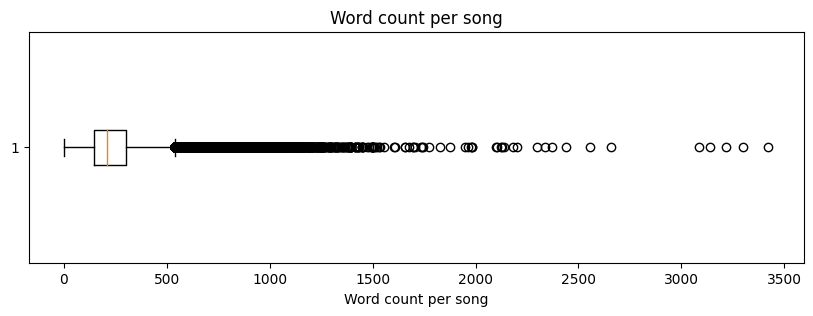

In [22]:
fig = plt.figure(figsize =(10, 3))
 
# Creating plot
plt.boxplot(data_sorted, vert=False)
plt.xlabel("Word count per song")
plt.title("Word count per song")
 
# show plot
plt.show()

In [23]:
median=np.median(data_sorted)
mean=np.mean(data_sorted)
std=np.std(data_sorted)
min=np.min(data_sorted)
max=np.max(data_sorted)

print(f" The median is {median}")
print(f" The mean is {mean}")
print(f" The standard deviation is {std}")
print(f" The max value is {max}")
print(f" The min value is {min}")


 The median is 211.0
 The mean is 250.22915949826395
 The standard deviation is 159.28802277743802
 The max value is 3422
 The min value is 1


## Next we take a look at how many songs do artists have
#### Therefore we will divide them into groups, to see, if there are maybe artists that might influence an A.I. more sngnificantly by just having many songs

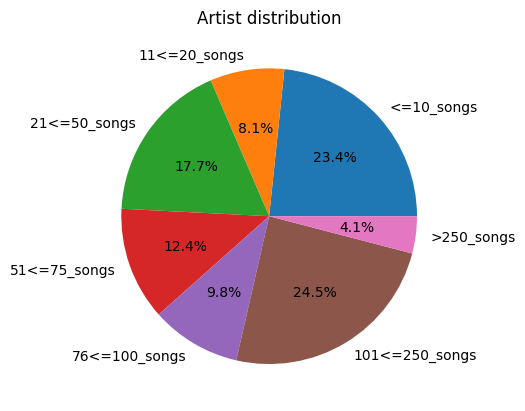

In [24]:
# plot how many song for each artist
helper = english_songs_df["Artist"].value_counts()
artist_count_df = pd.DataFrame({'Artist': helper.index, 'Count': helper.values})
# since too many artists: 
artist_count_df_categorized = pd.DataFrame(columns=["<=10_songs", "11<=20_songs","21<=50_songs", "51<=75_songs","76<=100_songs","101<=250_songs", ">250_songs"])
artist_count_df_categorized["<=10_songs"] = [len(artist_count_df[artist_count_df['Count']<=10])]
artist_count_df_categorized["11<=20_songs"] = [len(artist_count_df[artist_count_df['Count']<=20]) - len(artist_count_df[artist_count_df['Count']<=10])]
artist_count_df_categorized["21<=50_songs"] = [len(artist_count_df[artist_count_df['Count']<=50]) - len(artist_count_df[artist_count_df['Count']<=20])]
artist_count_df_categorized["51<=75_songs"] = [len(artist_count_df[artist_count_df['Count']<=75]) - len(artist_count_df[artist_count_df['Count']<=50])]
artist_count_df_categorized["76<=100_songs"] = [len(artist_count_df[artist_count_df['Count']<=100]) - len(artist_count_df[artist_count_df['Count']<=75])]
artist_count_df_categorized["101<=250_songs"] = [len(artist_count_df[artist_count_df['Count']<=250]) - len(artist_count_df[artist_count_df['Count']<=100])]
artist_count_df_categorized[">250_songs"] = [len(artist_count_df[artist_count_df['Count']>250])]

artist_count_df_categorized.head(5)
data = artist_count_df_categorized.iloc[:1].values[0]
labels = [col for col in artist_count_df_categorized.columns]
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Artist distribution')
plt.show()

## Now we will take a look at the occurences of the keywords used in our baseline project to label the data

In [25]:
# plot how often keywords of CNN
MOOD_CATEGORIES = {
    'calm': ['calm', 'comfort', 'quiet', 'serene', 'mellow', 'chill out'],
    'sad': ['sadness', 'unhappy', 'melancholic', 'melancholy'],
    'happy': ['happy', 'happiness', 'happy songs', 'happy music'],
    'romantic': ['romantic', 'romantic music'],
    'upbeat': ['upbeat', 'gleeful', 'high spirits', 'zest', 'enthusiastic'],
    'depressed': ['depressed', 'blue', 'dark', 'depressive', 'dreary'],
    'anger': ['anger', 'angry', 'choleric', 'fury', 'outraged', 'rage'],
    'grief': ['grief', 'heartbreak', 'mournful', 'sorrow', 'sorry'],
    'dreamy': ['dreamy'],
    'cheerful': ['cheerful', 'cheer up', 'festive', 'jolly', 'jovial', 'merry'],
    'brooding': ['brooding', 'contemplative', 'meditative', 'reflective'],
    'aggression': ['aggression', 'aggressive'],
    'confident': ['confident', 'encouraging', 'encouragement', 'optimism'],
    'angst': ['angst', 'anxiety', 'anxious', 'jumpy', 'nervous', 'angsty'],
    'earnest': ['earnest', 'heartfelt'],
    'desire': ['desire', 'hope', 'hopeful', 'mood: hopeful'],
    'pessimism': ['pessimism', 'cynical', 'pessimistic', 'weltschmerz'],
    'excitement': ['excitement', 'exciting', 'exhilarating', 'thrill', 'ardor']
}
keyword_distibution = {
    'calm': 0,
    'sad': 0,
    'happy': 0,
    'romantic': 0,
    'upbeat': 0,
    'depressed': 0,
    'anger': 0,
    'grief': 0,
    'dreamy': 0,
    'cheerful': 0,
    'brooding': 0,
    'aggression': 0,
    'confident': 0,
    'angst': 0,
    'earnest': 0,
    'desire': 0,
    'pessimism': 0,
    'excitement': 0
}
for song_text in english_songs_df["Song_Text"]:
    for key in MOOD_CATEGORIES:
        for keyword in MOOD_CATEGORIES[key]:
            if keyword in song_text:                
                keyword_distibution[key] += 1
keyword_distibution

{'calm': 6982,
 'sad': 1567,
 'happy': 9219,
 'romantic': 456,
 'upbeat': 56,
 'depressed': 28710,
 'anger': 13992,
 'grief': 8407,
 'dreamy': 84,
 'cheerful': 977,
 'brooding': 43,
 'aggression': 239,
 'confident': 319,
 'angst': 3485,
 'earnest': 47,
 'desire': 18147,
 'pessimism': 225,
 'excitement': 2525}

In [26]:
# This approach attempts to count only a mood once 
# (If for instance 2 keywords of a mood appear in 1 text, this counts as 1)
# This however will lead to the effect that sopngs are comunted multiple times, for every mood they can be identified with
song_distribution={
    'calm': 0,
    'sad': 0,
    'happy': 0,
    'romantic': 0,
    'upbeat': 0,
    'depressed': 0,
    'anger': 0,
    'grief': 0,
    'dreamy': 0,
    'cheerful': 0,
    'brooding': 0,
    'aggression': 0,
    'confident': 0,
    'angst': 0,
    'earnest': 0,
    'desire': 0,
    'pessimism': 0,
    'excitement': 0
}

for song_text in english_songs_df["Song_Text"]:
    for key in MOOD_CATEGORIES:
        for keyword in MOOD_CATEGORIES[key]:
            if keyword in song_text:
                song_distribution[key] += 1
                break


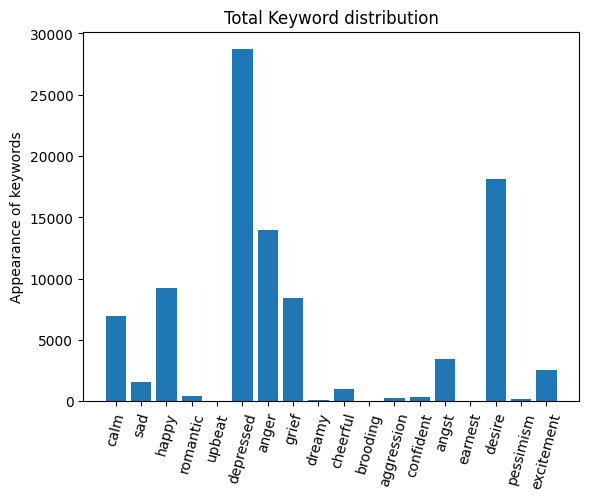

In [27]:
labels = [ k for k,v in keyword_distibution.items()]
data = [ v for k,v in keyword_distibution.items()]
fig, ax = plt.subplots()
plt.xticks(rotation = 75)
ax.bar(labels, data)

ax.set_ylabel('Appearance of keywords')
plt.title('Total Keyword distribution')
plt.show()

# The figure shows how often the kexwords of a mood category appear in all english texts

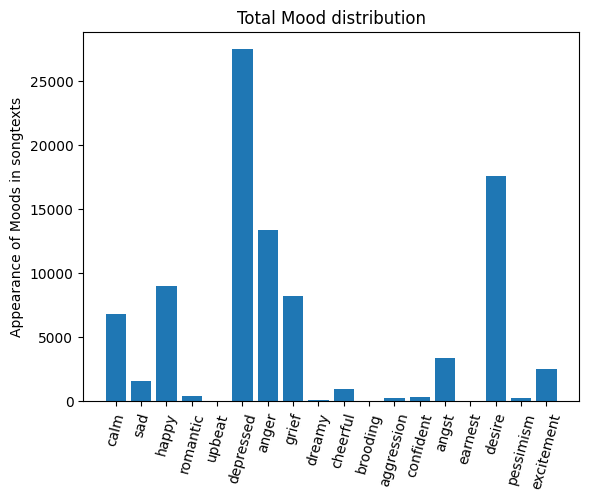

In [28]:
# The figure shows in how many songs the keywords of a mood category appear 
# (If for instance 2 keywords appear in 1 text, this counts as 1)",

labels = [ k for k,v in song_distribution.items()]
data = [ v for k,v in song_distribution.items()]
fig, ax = plt.subplots()
plt.xticks(rotation = 75)
ax.bar(labels, data)
ax.set_ylabel('Appearance of Moods in songtexts')
plt.title('Total Mood distribution')
plt.show()

### Now plot the distribution with regards to the total ammount of songs

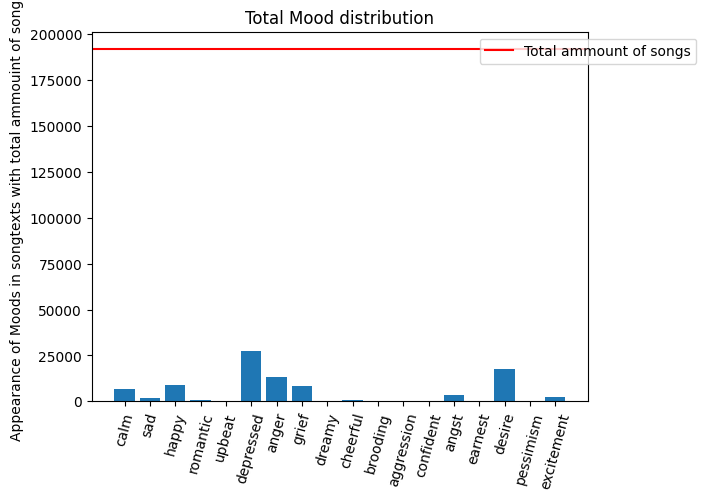

In [29]:
# The figure shows in how many songs the keywords of a mood category appear 
# (If for instance 2 keywords appear in 1 text, this counts as 1)",

labels = [ k for k,v in song_distribution.items()]
data = [ v for k,v in song_distribution.items()]
fig, ax = plt.subplots()
plt.xticks(rotation = 75)
ax.bar(labels, data)
ax.set_ylabel('Appearance of Moods in songtexts with total ammouint of songs')
plt.title('Total Mood distribution')
plt.axhline(y = len(english_songs_df["Song_Text"]), color = 'r', linestyle = '-', label = "Total ammount of songs")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()

## Now we will calculate how many songs can be identified with a mood at all

In [30]:
songs_without_moods = 0

for song_text in english_songs_df["Song_Text"]:
    flag = 0
    for key in MOOD_CATEGORIES:
        for keyword in MOOD_CATEGORIES[key]:
            if keyword in song_text:
                flag = 1
                break
    if flag == 0:
        songs_without_moods += 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


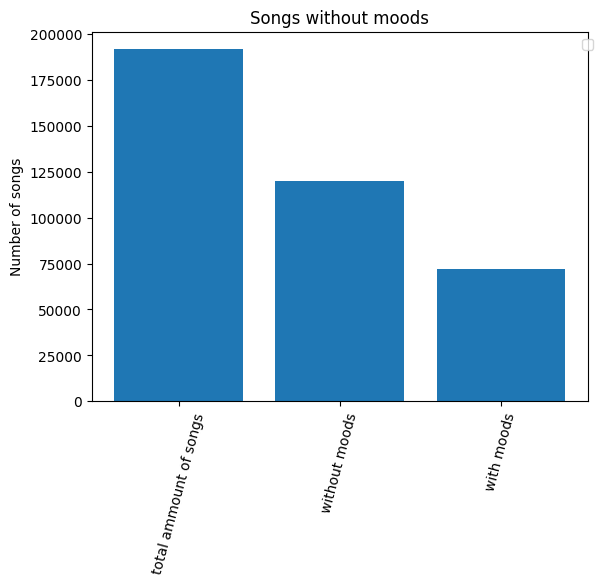

In [31]:
# the following figure shows the ammount of songs not containing any of the mood keywords

labels = ["total ammount of songs", "without moods", "with moods"]
data = [ len(english_songs_df["Song_Text"]), songs_without_moods, len(english_songs_df["Song_Text"])-songs_without_moods ]
fig, ax = plt.subplots()
plt.xticks(rotation = 75)
ax.bar(labels, data)
ax.set_ylabel('Number of songs')
plt.title('Songs without moods')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()